In [1]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt 

In [2]:
### splitting the data

from sklearn.model_selection import train_test_split

df = pd.read_csv("encoded_df.csv")
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

train_data = pd.DataFrame()
val_data = pd.DataFrame()
test_data = pd.DataFrame()

for ervaring_0 in df['ervaring_0'].unique():
    for geslacht_M in df['geslacht_M'].unique():
        for gewichtsklasse_L in df['gewichtsklasse_L'].unique():
            subset = df[(df['ervaring_0'] == ervaring_0) & 
                        (df['geslacht_M'] == geslacht_M) & 
                        (df['gewichtsklasse_L'] == gewichtsklasse_L)]
            if not subset.empty:
                temp_train, temp_temp = train_test_split(subset, test_size=0.3, random_state=42)
                temp_val, temp_test = train_test_split(temp_temp, test_size=0.3, random_state=42)
                train_data = pd.concat([train_data, temp_train])
                val_data = pd.concat([val_data, temp_val])
                test_data = pd.concat([test_data, temp_test])

train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

print(f"Train data: {len(train_data)} rows")
print(f"Validation data: {len(val_data)} rows")
print(f"Test data: {len(test_data)} rows")

X_train = train_data.drop(columns=['2k tijd'])
y_train = train_data['2k tijd']
X_val = val_data.drop(columns=['2k tijd'])
y_val = val_data['2k tijd']
X_test = test_data.drop(columns=['2k tijd'])
y_test = test_data['2k tijd']

Train data: 3018 rows
Validation data: 905 rows
Test data: 391 rows


/home/imme/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
/home/imme/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


most fitting lambda: 0.1
MSE: 67.36248396797619
RMSE: 8.207465136567818
MAE: 6.394835606067683
R-squared: 0.9344542482018328
         y_pred  y_test  pred - test
0    420.426012     427    -6.573988
1    425.020187     420     5.020187
2    426.510960     418     8.510960
3    423.588256     427    -3.411744
4    429.508260     427     2.508260
..          ...     ...          ...
386  384.917059     381     3.917059
387  386.935457     379     7.935457
388  386.348990     389    -2.651010
389  384.183438     382     2.183438
390  380.417874     381    -0.582126

[391 rows x 3 columns]


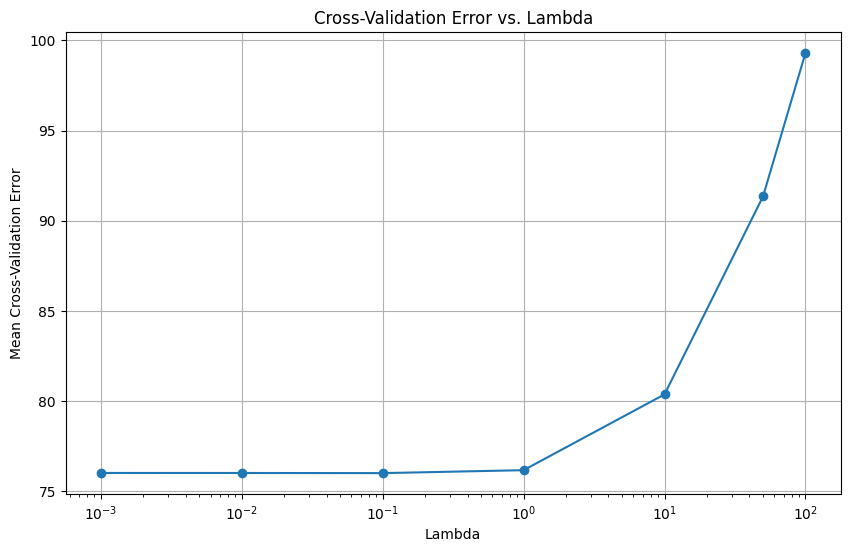

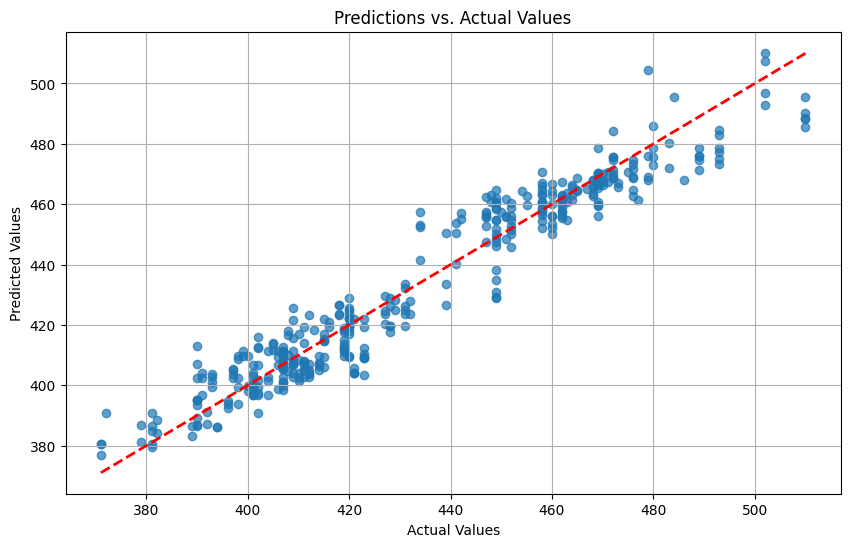

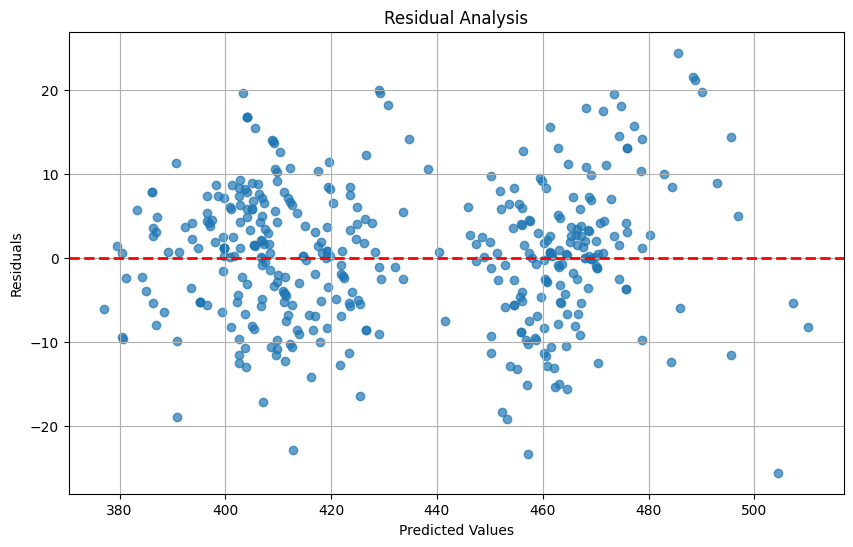

In [3]:
X_train, X_val = X_train.align(X_val, join='outer', axis=1, fill_value=0)
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

poss_lam = [0.001, 0.01, 0.1, 1.0, 10.0, 50.0, 100.0]

ridge_cv_model = RidgeCV(alphas=poss_lam, store_cv_values=True)
ridge_cv_model.fit(X_train, y_train)

print(f"most fitting lambda: {ridge_cv_model.alpha_}")

ridge_model = Ridge(alpha=ridge_cv_model.alpha_)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

print(pd.DataFrame({'y_pred': y_pred, 'y_test': y_test, 'pred - test': y_pred - y_test}))


cv_errors = np.mean(ridge_cv_model.cv_values_, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(poss_lam, cv_errors, marker='o')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Mean Cross-Validation Error')
plt.title('Cross-Validation Error vs. Lambda')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs. Actual Values')
plt.grid(True)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.grid(True)
plt.show()
